# Explority data analysis (EDA)
- Some investigation of the dataset before doing the clean and feature engineering

In [1]:
#Import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xlwings import view
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, ElasticNetCV, Lasso, LassoCV

## Data Preprocessing

In [2]:
#Read dataset
train_df = pd.read_csv('data/train.csv', sep = ',')
test_df = pd.read_csv('data/test.csv', sep = ',')

### Check of data

In [3]:
#Shape
print("----- SHAPE -----")
train_df.shape

----- SHAPE -----


(1460, 81)

In [4]:
#Info
print("----- INFO -----")
train_df.info()

----- INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int6

In [5]:
for col in test_df.columns:
    if test_df[col].dtype != train_df[col].dtype:
        print(f"Column: {col}, Test dtype: {test_df[col].dtype}, Train dtype: {train_df[col].dtype}")
        test_df[col] = test_df[col].fillna(0)
        test_df[col] = test_df[col].astype(int)
for i in test_df.columns:
    if test_df[i].dtype != train_df[i].dtype:
        print(i, test_df[i].dtype, train_df[i].dtype)
        test_df[i] = test_df[i].fillna(0)
        test_df[i] = test_df[i].astype(int)
        print(i, test_df[i].dtype, train_df[i].dtype)

Column: BsmtFinSF1, Test dtype: float64, Train dtype: int64
Column: BsmtFinSF2, Test dtype: float64, Train dtype: int64
Column: BsmtUnfSF, Test dtype: float64, Train dtype: int64
Column: TotalBsmtSF, Test dtype: float64, Train dtype: int64
Column: BsmtFullBath, Test dtype: float64, Train dtype: int64
Column: BsmtHalfBath, Test dtype: float64, Train dtype: int64
Column: GarageCars, Test dtype: float64, Train dtype: int64
Column: GarageArea, Test dtype: float64, Train dtype: int64


## Correlation matrix

## Handle Missing values

In [6]:
#Checking features for missing value by getting the percentage of missing values

missing_values_percent = [(col,train_df[col].isna().mean() * 100) for col in train_df]
missing_values_percent = pd.DataFrame(missing_values_percent, columns = ["column_name", "percentage"])
missing_values_percent

,column_name,percentage
0,Id,0.000000
1,MSSubClass,0.000000
2,MSZoning,0.000000
3,LotFrontage,17.739726
4,LotArea,0.000000
...,...,...
76,MoSold,0.000000
77,YrSold,0.000000
78,SaleType,0.000000
79,SaleCondition,0.000000


### Features with Null values

/var/folders/_0/wx2hxqy90vl4lrsknhfp343w0000gn/T/ipykernel_53348/3633100850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values.sort_values(by = "percentage", ascending=False, inplace=True)


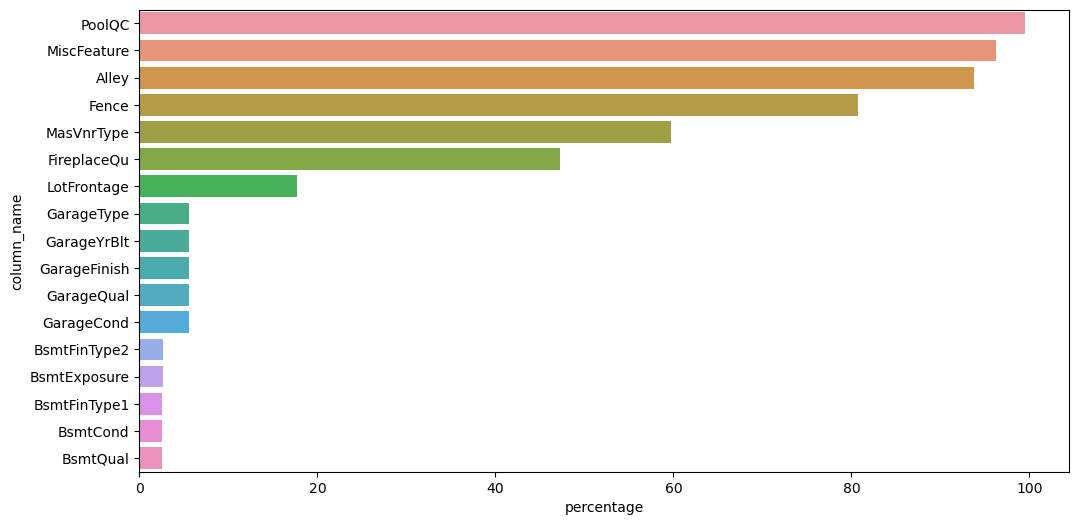

In [7]:
#Fetch features with more than 1% missing values
missing_values = missing_values_percent[missing_values_percent.percentage > 1]

#Sort by descending percentage
missing_values.sort_values(by = "percentage", ascending=False, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(missing_values, x="percentage", y = "column_name")
plt.show()

Features with more than 80% missing values can be dropped. Drop PoolQC, MiscFeature, Alley and Fence 

In [8]:
train1_df = train_df.copy()
train1_df = train1_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id'], axis = 1)

In [12]:
print(train1_df[train1_df['MasVnrType'].isna() == True])

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1             20       RL         80.0     9600   Pave      Reg         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
5             50       RL         85.0    14115   Pave      IR1         Lvl   
8             50       RM         51.0     6120   Pave      Reg         Lvl   
9            190       RL         50.0     7420   Pave      Reg         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1454          20       FV         62.0     7500   Pave      Reg         Lvl   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPor

In [12]:
null_columns = train1_df.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

The NAN-values in the categorical features are likely to represent that the feature is not present in that category. E.g. we can see that there are 81 that does not have a garage, and all the fatures related to garage are NaN. We can see that there might be some inconsistency in the dataset as for Bsmt there is some features with 37 Null Values and some with 38 NullValues. We can therefore do some more analysis on this. 

In [20]:
# Check for rows with Bsmt inconsistencies
print('Count\t #\t BsmtQual\t BsmtExposure\t BsmtFinType1\t BsmtFinType2\t BsmtCond')
s=0
df = pd.DataFrame(columns=['Count', '#', 'BsmtQual','BsmtExposure', 'BsmtFinType1','BsmtFinType2','BsmtCond'])
for i in range(len(train1_df)):
    if train1_df['BsmtExposure'].isnull()[i] or train1_df['BsmtFinType2'].isnull()[i] == True:
        if train1_df['BsmtCond'].isnull()[i] == False:
            s+=1
            new_row = {'Count':s, '#':i,'BsmtQual' : train1_df['BsmtQual'].isnull()[i],
                       'BsmtExposure':train1_df['BsmtExposure'].isnull()[i],
                       'BsmtFinType1' :train1_df['BsmtFinType1'].isnull()[i],
                       'BsmtFinType2' :train1_df['BsmtFinType2'].isnull()[i],
                       'BsmtCond' :train1_df['BsmtCond'].isnull()[i]}
            df = df._append(new_row, ignore_index = True)

Count	 #	 BsmtQual	 BsmtExposure	 BsmtFinType1	 BsmtFinType2	 BsmtCond


Inconsistency in row 332 and row 948, so we can delete those two rows. 

In [15]:
train1_df = train1_df.drop([332, 948], axis = 0).reset_index(drop = True)

Will also do some analysis on MasVnrType and MasVnrArea, as there is 872 NaN values for MasVnrType, and only 8 for MasVnrArea. Want to check the values for MasVnrArea when the MasVnrType is NaN

In [32]:
masVnrTypeNaN = train1_df[train1_df['MasVnrType'].isna() == True] 
masVnrAreaNaN = masVnrTypeNaN[masVnrTypeNaN['MasVnrArea'].isna() == True]
masVnrAreaNaN['MasVnrArea']


234    NaN
528    NaN
649    NaN
935    NaN
971    NaN
975    NaN
1241   NaN
1276   NaN
Name: MasVnrArea, dtype: float64

This means that all the 8 missing values for MasVnrArea have the value NaN for MasVnrType as well, and we can set all the missing MasVnrArea values to be 0. 

In [33]:
train1_df['MasVnrArea'] = train1_df['MasVnrArea'].fillna(0)

### Splitting categorical and numerical features

In [12]:
#Fetch the numerical and categorical features
num_features_df = train1_df.select_dtypes(include = [np.number])
cat_features_df = train1_df.select_dtypes(include = ["object"])

### Numerical features

In [13]:
#Fill missing values with mean
num_features_df = num_features_df.fillna(num_features_df.mean())

#### Histogram of all numerical features

In [ ]:
fig, axes = plt.subplots(17, 2, figsize=(20, 60), sharey=False)

s, r, c = 0,0,0
for i in num_features_df.columns:
    if num_features_df[i].dtype == 'int64':
        s+=1
        if s > 1 and r < 17:
            sns.histplot(num_features_df[i], ax = axes[r,c])
            c += 1
            if c > 1:
                r+=1; c = 0

In [15]:
#Drop columns
train_df = train_df.drop(columns=['PoolArea', 'MiscVal', 'Alley', 'Fence', ])

#### Correlation matrix for numerical features

In [ ]:
num_df_tmp = num_features_df.copy()
corr = num_features_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8},linewidths=.5, linecolor='black' )
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
corr_target = corr['SalePrice'].sort_values(ascending=False)
threshold = 0.5
high_corr_features = corr_target[abs(corr_target) > threshold].index
high_corr_matrix = num_features_df[high_corr_features].corr()
styled_corr_matrix = high_corr_matrix.style.background_gradient(cmap='coolwarm')
styled_corr_matrix = high_corr_matrix.style.background_gradient(cmap='coolwarm', axis=None).set_properties(**{'max-width': '80px', 'font-size': '10pt'})
styled_corr_matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
#plt.title('Correlation Matrix of Highly Correlated Features')
#plt.show()

In [ ]:
# Correlation with target value
corr_price = corr["SalePrice"]
corr_price_table = corr_price.to_frame()
corr_price_table.style.background_gradient(cmap = "coolwarm")

#### Categorical features

In [ ]:
cat_features_df.dtypes

### Plots 

#### Distribution of house prices

In [ ]:
#Plots
sns.histplot(train_df['SalePrice'])

#### Distribution of numerical features 


In [ ]:
list(set(train_df.dtypes.to_list()))
train_df_num = train_df.select_dtypes(include = ['float64', 'int64'])
train_df_num.hist(figsize=(16,20), bins = 50, xlabelsize=8, ylabelsize=8)

In [ ]:
quality_pivot = train_df.pivot_table(index = "OverallQual", values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind = 'bar')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')

In [ ]:
#Normalize the data
train_df_norm = train_df.copy()
train_df_norm['GrLivArea_log'] = np.log(train_df_norm['GrLivArea'])
train_df_norm['SalePrice_log'] = np.log(train_df_norm['SalePrice'])
plt.figure(figsize=(12,6))
data = pd.concat([train_df_norm['GrLivArea_log'], train_df_norm['SalePrice_log']], axis = 1)
sns.regplot(
    data = data,
    x = 'GrLivArea_log',
    y='SalePrice_log', 
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title('Log-Transformed Living Area vs. Sale Price')
plt.xlabel('Log of Above Ground Living Area (square feet)')
plt.ylabel('Log of Sale Price')
plt.show()

In [ ]:
#Unique values 
unique_counts = train_df.nunique()
unique_counts

In [25]:
#Finding irrelavant features
